**Assignment 3: Support Vector Machine Classifier**


Machine Learning CS30006


Haasita Pinnepu 19CS30021
Piriya Sai Swapnika 19CS30035

In [159]:
import pandas as pd

In [160]:
dataset = pd.read_csv('datatraining_1.txt')
print(dataset.head())

                  date  Temperature  Humidity  ...     CO2  HumidityRatio  Occupancy
1  2015-02-04 17:51:00        23.18   27.2720  ...  721.25       0.004793          1
2  2015-02-04 17:51:59        23.15   27.2675  ...  714.00       0.004783          1
3  2015-02-04 17:53:00        23.15   27.2450  ...  713.50       0.004779          1
4  2015-02-04 17:54:00        23.15   27.2000  ...  708.25       0.004772          1
5  2015-02-04 17:55:00        23.10   27.2000  ...  704.50       0.004757          1

[5 rows x 7 columns]


In [161]:
dataset = dataset.drop(dataset.columns[0], axis = 1)
print(dataset.head())

   Temperature  Humidity  Light     CO2  HumidityRatio  Occupancy
1        23.18   27.2720  426.0  721.25       0.004793          1
2        23.15   27.2675  429.5  714.00       0.004783          1
3        23.15   27.2450  426.0  713.50       0.004779          1
4        23.15   27.2000  426.0  708.25       0.004772          1
5        23.10   27.2000  426.0  704.50       0.004757          1


In [162]:
!pip install fast_ml

In [163]:
# Question 1 Solution
from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(dataset, target='Occupancy', train_size=0.7, valid_size=0.1, test_size=0.2)

print("Training Data: " + str(X_train.shape))
print(X_train.head())
print("\n")
print("Validation Data: " + str(X_valid.shape))
print(X_valid.head())
print("\n")
print("Testing Data: " + str(X_test.shape))
print(X_test.head())

Training Data: (14391, 5)
      Temperature  Humidity  Light      CO2  HumidityRatio
2284      20.8400   24.1500    0.0   576.00       0.003673
1341      22.3900   26.7450  449.5  1074.25       0.004478
9164      20.8900   30.2000    0.0  1202.00       0.004614
7058      21.9175   37.2725  444.0  1762.00       0.006079
1409      23.7900   24.2000  133.0   631.50       0.004410


Validation Data: (2056, 5)
      Temperature  Humidity   Light      CO2  HumidityRatio
7948      20.1000   33.0900    0.00   447.50       0.004817
7008      21.3900   28.4725  442.75  1003.00       0.004485
2817      21.7675   21.8650  460.00   947.25       0.003519
2207      20.8900   24.0500    0.00   582.50       0.003669
4978      20.0000   34.7300    0.00   544.00       0.005026


Testing Data: (4113, 5)
      Temperature  Humidity       Light          CO2  HumidityRatio
8397        21.29     31.29  433.000000   986.750000       0.004902
2191        20.29     18.60    0.000000   437.000000       0.002731
6

In [164]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_valid_std = sc.transform(X_valid)
X_test_std = sc.transform(X_test)

print("Training Data after scaling: " + str(X_train_std.shape))
print("\n")
print("Validation Data after scaling: " + str(X_valid_std.shape))
print("\n")
print("Testing Data after scaling: " + str(X_test_std.shape))

Training Data after scaling: (14391, 5)


Validation Data after scaling: (2056, 5)


Testing Data after scaling: (4113, 5)


Implementing PCA

In [165]:
from sklearn.decomposition import PCA

# intialize pca
pca = PCA(n_components=2)

# fit and transform data
X_train_pca = pca.fit_transform(X_train_std)
X_valid_pca = pca.transform(X_valid_std)
X_test_pca = pca.transform(X_test_std)

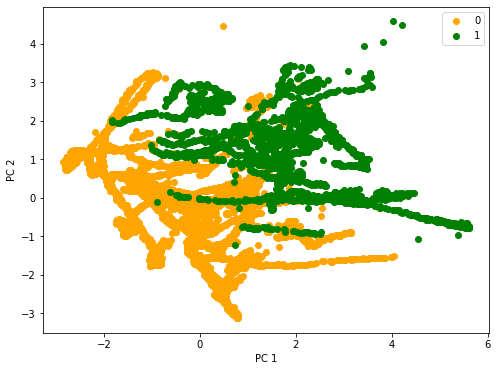

In [166]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['orange', 'g']
markers = ['o', 'o']
plt.figure(figsize=(8,6))
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m, cmap='plasma') 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

In [167]:
from sklearn import svm
from sklearn import metrics

clf_linear = svm.SVC(kernel='linear') # Linear Kernel
clf_linear.fit(X_train_pca, y_train)

clf_rbf = svm.SVC(kernel='rbf', gamma=1, C=100) # rbf Kernel
clf_rbf.fit(X_train_pca, y_train)

clf_poly = svm.SVC(kernel='poly') # polynomial Kernel
clf_poly.fit(X_train_pca, y_train)

y_pred_linear = clf_linear.predict(X_valid_pca)
y_pred_rbf = clf_rbf.predict(X_valid_pca)
y_pred_poly = clf_poly.predict(X_valid_pca)

print(" Kernel  |  Accuracy ")
print("---------|----------- ")
print(" Linear  |", metrics.accuracy_score(y_valid, y_pred_linear))
print("  rbf    |", metrics.accuracy_score(y_valid, y_pred_rbf))
print(" poly    |", metrics.accuracy_score(y_valid, y_pred_poly))

 Kernel  |  Accuracy 
---------|----------- 
 Linear  | 0.936284046692607
  rbf    | 0.9732490272373541
 poly    | 0.9265564202334631


In [168]:
# we choose rbf kernel as it has the highest accuracy
y_pred = clf_rbf.predict(X_test_pca)
print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Test Accuracy:  0.9671772428884027


Implementing LDA

In [169]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)

X_train_lda = lda.fit_transform(X_train_std, y_train)
X_valid_lda = lda.transform(X_valid_std)
X_test_lda = lda.transform(X_test_std)

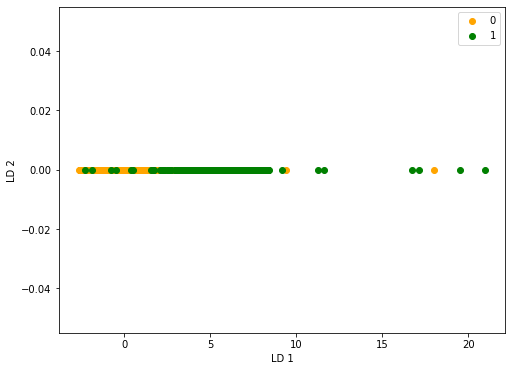

In [170]:
# Plotting LDA data
colors = ['orange', 'g']
markers = ['o', 'o']
plt.figure(figsize=(8,6))
val = 0
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0], 
                np.zeros_like(X_train_lda[y_train==l, 0]) + val, 
                c=c, label=l, marker=m, cmap='rainbow') 
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend()
plt.show()

In [171]:
clf_linear_lda = svm.SVC(kernel='linear', degree = 2) # Linear Kernel
clf_linear_lda.fit(X_train_lda, y_train)
y_pred_linear_lda = clf_linear_lda.predict(X_valid_lda)
acc_linear_lda = metrics.accuracy_score(y_valid, y_pred_linear_lda)

clf_rbf_lda = svm.SVC(kernel='rbf', gamma=1, C=100, degree = 2) # rbf Kernel
clf_rbf_lda.fit(X_train_lda, y_train)
y_pred_rbf_lda = clf_rbf_lda.predict(X_valid_lda)
acc_rbf_lda = metrics.accuracy_score(y_valid, y_pred_rbf_lda)

clf_poly_lda = svm.SVC(kernel='poly', degree = 2) # polynomial Kernel
clf_poly_lda.fit(X_train_lda, y_train)
y_pred_poly_lda = clf_poly_lda.predict(X_valid_lda)
acc_poly_lda = metrics.accuracy_score(y_valid, y_pred_poly_lda)

print(" Kernel  |  Accuracy ")
print("---------|----------- ")
print(" Linear  |", acc_linear_lda )
print("  rbf    |", acc_rbf_lda )
print(" poly    |", acc_poly_lda )

 Kernel  |  Accuracy 
---------|----------- 
 Linear  | 0.9888132295719845
  rbf    | 0.9892996108949417
 poly    | 0.9892996108949417


In [172]:
# comparing validation accuracies to get best kernel for lda
if (acc_linear_lda >= acc_rbf_lda) and (acc_linear_lda >= acc_poly_lda):
  best = 0
elif (acc_rbf_lda >= acc_linear_lda) and (acc_rbf_lda >= acc_poly_lda):
  best = 1
else:
  best = 2

In [173]:
if(best == 0):
  print("The kernel we choose is Linear with")
  y_pred_lda = clf_linear_lda.predict(X_test_lda)
  print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred_lda))
elif(best == 1):
  print("The kernel we choose is rbf with")
  y_pred_lda = clf_rbf_lda.predict(X_test_lda)
  print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred_lda))
else:
  print("The kernel we choose is poly with")
  y_pred_lda = clf_poly_lda.predict(X_test_lda)
  print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred_lda))


The kernel we choose is rbf with
Test Accuracy:  0.9878434232920009
